In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=63e3a1cf7bb97f9a4809d8328ade79e90f98bc96b3335385402c04064ad708d5
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

In [13]:
df = pd.read_csv('/content/sample_pandas_6.csv')
df.head()

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


In [9]:
category_df = pd.read_csv('/content/category.csv')
category_df.head()

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞


In [14]:
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,雑貨


In [25]:
category_count = df['カテゴリー'].value_counts()
category_count

,count
カテゴリー,
弁当,49
菓子類,38
飲料水,36
デザート,30
雑貨,27
図書・新聞,20


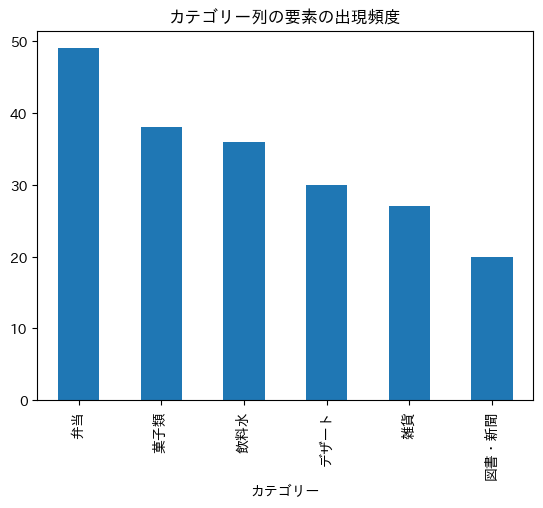

In [33]:
plt.title('カテゴリー列の要素の出現頻度')
category_count.plot(kind='bar')
plt.show()

In [39]:
df.groupby('商品番号')['在庫'].sum()

,在庫
商品番号,
1QJFO8QY,890
2HSTCDWM,535
48XMJXKO,270
8T7D5DQA,660
MESUDVWQ,395
QRMOGNUU,725
S6RE8W6X,430
X0ZE2ZMY,360
YY4HAAZR,425


In [40]:
df.groupby('商品番号')['在庫'].describe()

,count,mean,std,min,25%,50%,75%,max
商品番号,,,,,,,,
1QJFO8QY,32.0,27.812500,16.111381,0.0,13.75,27.5,40.00,50.0
2HSTCDWM,20.0,26.750000,15.067829,5.0,10.00,30.0,40.00,50.0
48XMJXKO,10.0,27.000000,18.737959,0.0,10.00,27.5,42.50,50.0
8T7D5DQA,21.0,31.428571,16.743869,0.0,20.00,35.0,45.00,50.0
MESUDVWQ,17.0,23.235294,15.904125,0.0,10.00,25.0,40.00,45.0
QRMOGNUU,27.0,26.851852,17.821128,0.0,10.00,20.0,45.00,50.0
S6RE8W6X,20.0,21.500000,12.680279,0.0,15.00,22.5,25.00,50.0
X0ZE2ZMY,14.0,25.714286,12.224997,0.0,21.25,25.0,30.00,45.0
YY4HAAZR,17.0,25.000000,17.677670,0.0,10.00,20.0,40.00,50.0
